<a href="https://colab.research.google.com/github/MatthewC00273575/Data-Science/blob/master/RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("/content/medical_insurance.csv")

# Separate features and target variable
X = data.drop(columns=["charges"])
y = data["charges"]

# Identify categorical and numerical columns
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

# Preprocess data: One-hot encode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# Define the model pipeline
model_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(random_state=42))
    ]
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

Mean Absolute Error (MAE): $1282.94
Root Mean Squared Error (RMSE): $2756.49


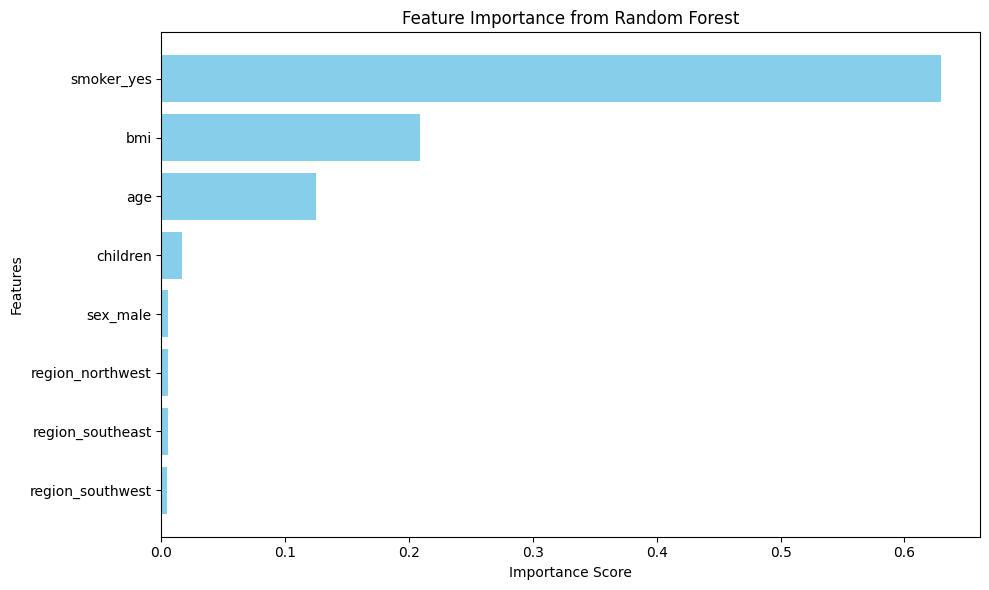

In [17]:
# Feature Importance Visualization
# Extract feature names after preprocessing
categorical_encoded = model_pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
all_features = numerical_features + list(categorical_encoded)

# Extract feature importances from the Random Forest model
model = model_pipeline.named_steps["model"]
feature_importances = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importances)[::-1]
plt.barh([all_features[i] for i in sorted_idx], feature_importances[sorted_idx], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [23]:
# Define new individuals' data
new_individuals = pd.DataFrame({
    "age": [18, 45],               # Example: 25 years old, 45 years old
    "sex": ["male", "female"],     # Example: Male, Female
    "bmi": [18.5, 30.2],           # Example: BMI values
    "children": [0, 4],            # Example: No children, 2 children
    "smoker": ["no", "yes"],       # Example: Non-smoker, Smoker
    "region": ["southeast", "southeast"]  # Example: Regions
})

# Predict medical expenses
predicted_charges = model_pipeline.predict(new_individuals)

# Display results
for i, expense in enumerate(predicted_charges):
    print(f"Individual {i+1}: Predicted Medical Expense = ${expense:.2f}")


Individual 1: Predicted Medical Expense = $1845.05
Individual 2: Predicted Medical Expense = $49815.30
